In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Kara = pd.read_excel(filepath, sheet_name='Kara-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Kara)
fp.date_time(Kara)

,Extent,Date
0,917992.880,1979-01-01
1,917992.880,1979-02-01
2,917992.880,1979-03-01
3,917992.880,1979-04-01
4,917992.880,1979-05-01
...,...,...
533,728642.743,2023-06-01
534,437024.646,2023-07-01
535,202260.789,2023-08-01
536,98103.856,2023-09-01


In [5]:
scaler = MinMaxScaler()
Kara['Extent'] = scaler.fit_transform(Kara['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 7
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Kara['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((520, 12, 1), (520,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Kara_model_LT7/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/53 [==========================>...] - ETA: 0s - loss: 0.6602 - root_mean_squared_error: 0.8125

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 8s 100ms/step - loss: 0.6566 - root_mean_squared_error: 0.8103 - val_loss: 0.4378 - val_root_mean_squared_error: 0.6617
Epoch 2/50
39/53 [=====================>........] - ETA: 0s - loss: 0.5935 - root_mean_squared_error: 0.7704

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.5691 - root_mean_squared_error: 0.7544 - val_loss: 0.3956 - val_root_mean_squared_error: 0.6290
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.4999 - root_mean_squared_error: 0.7071

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 85ms/step - loss: 0.4979 - root_mean_squared_error: 0.7057 - val_loss: 0.3617 - val_root_mean_squared_error: 0.6014
Epoch 4/50
43/53 [=======================>......] - ETA: 0s - loss: 0.4445 - root_mean_squared_error: 0.6667

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 81ms/step - loss: 0.4330 - root_mean_squared_error: 0.6581 - val_loss: 0.3241 - val_root_mean_squared_error: 0.5693
Epoch 5/50
52/53 [============================>.] - ETA: 0s - loss: 0.3690 - root_mean_squared_error: 0.6074

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.3695 - root_mean_squared_error: 0.6078 - val_loss: 0.2766 - val_root_mean_squared_error: 0.5260
Epoch 6/50
50/53 [===========================>..] - ETA: 0s - loss: 0.3146 - root_mean_squared_error: 0.5609

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.3148 - root_mean_squared_error: 0.5611 - val_loss: 0.2557 - val_root_mean_squared_error: 0.5057
Epoch 7/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2705 - root_mean_squared_error: 0.5201

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.2666 - root_mean_squared_error: 0.5164 - val_loss: 0.2096 - val_root_mean_squared_error: 0.4578
Epoch 8/50
48/53 [==========================>...] - ETA: 0s - loss: 0.2206 - root_mean_squared_error: 0.4697

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.2202 - root_mean_squared_error: 0.4693 - val_loss: 0.1775 - val_root_mean_squared_error: 0.4213
Epoch 9/50
48/53 [==========================>...] - ETA: 0s - loss: 0.1805 - root_mean_squared_error: 0.4249

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.1785 - root_mean_squared_error: 0.4225 - val_loss: 0.1221 - val_root_mean_squared_error: 0.3494
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1459 - root_mean_squared_error: 0.3819

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.1455 - root_mean_squared_error: 0.3815 - val_loss: 0.1146 - val_root_mean_squared_error: 0.3385
Epoch 11/50
52/53 [============================>.] - ETA: 0s - loss: 0.1173 - root_mean_squared_error: 0.3425

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.1182 - root_mean_squared_error: 0.3438 - val_loss: 0.0772 - val_root_mean_squared_error: 0.2779
Epoch 12/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0953 - root_mean_squared_error: 0.3087

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0928 - root_mean_squared_error: 0.3046 - val_loss: 0.0627 - val_root_mean_squared_error: 0.2504
Epoch 13/50
53/53 [==============================] - ETA: 0s - loss: 0.0760 - root_mean_squared_error: 0.2757

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0760 - root_mean_squared_error: 0.2757 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2091
Epoch 14/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0659 - root_mean_squared_error: 0.2568

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 79ms/step - loss: 0.0658 - root_mean_squared_error: 0.2566 - val_loss: 0.0328 - val_root_mean_squared_error: 0.1812
Epoch 15/50
53/53 [==============================] - 0s 4ms/step - loss: 0.0500 - root_mean_squared_error: 0.2235 - val_loss: 0.0336 - val_root_mean_squared_error: 0.1834
Epoch 16/50
53/53 [==============================] - ETA: 0s - loss: 0.0498 - root_mean_squared_error: 0.2232

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0498 - root_mean_squared_error: 0.2232 - val_loss: 0.0232 - val_root_mean_squared_error: 0.1522
Epoch 17/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0343 - root_mean_squared_error: 0.1852

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0347 - root_mean_squared_error: 0.1861 - val_loss: 0.0220 - val_root_mean_squared_error: 0.1484
Epoch 18/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0343 - root_mean_squared_error: 0.1853 - val_loss: 0.0298 - val_root_mean_squared_error: 0.1725
Epoch 19/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0282 - root_mean_squared_error: 0.1679 - val_loss: 0.0233 - val_root_mean_squared_error: 0.1526
Epoch 20/50
53/53 [==============================] - 0s 4ms/step - loss: 0.0303 - root_mean_squared_error: 0.1742 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1985
Epoch 21/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0833 - val_root_mean_squared_error: 0.2886
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0287 - root_mean_squared_error: 0.1696 - val_loss: 0.0329 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0257 - root_mean_squared_error: 0.1605 - val_loss: 0.0192 - val_root_mean_squared_error: 0.1385
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0265 - root_mean_squared_error: 0.1628 - val_loss: 0.0505 - val_root_mean_squared_error: 0.2247
Epoch 26/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0240 - root_mean_squared_error: 0.1548

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0259 - root_mean_squared_error: 0.1609 - val_loss: 0.0191 - val_root_mean_squared_error: 0.1382
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0267 - root_mean_squared_error: 0.1635 - val_loss: 0.0406 - val_root_mean_squared_error: 0.2014
Epoch 28/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0264 - root_mean_squared_error: 0.1624 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2307
Epoch 29/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0263 - root_mean_squared_error: 0.1622 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1518
Epoch 30/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0248 - root_mean_squared_error: 0.1576 - val_loss: 0.0210 - val_root_mean_squared_error: 0.1450
Epoch 31/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0227 - root_mean_squared_error: 0.1508 - val_loss: 0.0320 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0233 - root_mean_squared_error: 0.1525 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1225
Epoch 34/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0226 - root_mean_squared_error: 0.1504 - val_loss: 0.0230 - val_root_mean_squared_error: 0.1515
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0254 - root_mean_squared_error: 0.1594 - val_loss: 0.0275 - val_root_mean_squared_error: 0.1658
Epoch 36/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0241 - root_mean_squared_error: 0.1554 - val_loss: 0.0551 - val_root_mean_squared_error: 0.2347
Epoch 37/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0304 - root_mean_squared_error: 0.1743 - val_loss: 0.0364 - val_root_mean_squared_error: 0.1907
Epoch 38/50
53/53 [==============================] - 0s 5ms/step - loss: 0.0249 - root_mean_squared_error: 0.1577 - val_loss: 0.0348 - val_root_mean_squared

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 84ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - val_loss: 0.0141 - val_root_mean_squared_error: 0.1189
Epoch 47/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0240 - root_mean_squared_error: 0.1551 - val_loss: 0.0164 - val_root_mean_squared_error: 0.1280
Epoch 48/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1230
Epoch 49/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0225 - root_mean_squared_error: 0.1499 - val_loss: 0.0226 - val_root_mean_squared_error: 0.1505
Epoch 50/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0238 - root_mean_squared_error: 0.1542

INFO:tensorflow:Assets written to: Kara_model_LT7\assets


INFO:tensorflow:Assets written to: Kara_model_LT7\assets


53/53 [==============================] - 4s 78ms/step - loss: 0.0234 - root_mean_squared_error: 0.1530 - val_loss: 0.0136 - val_root_mean_squared_error: 0.1165


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.5698742548624673 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

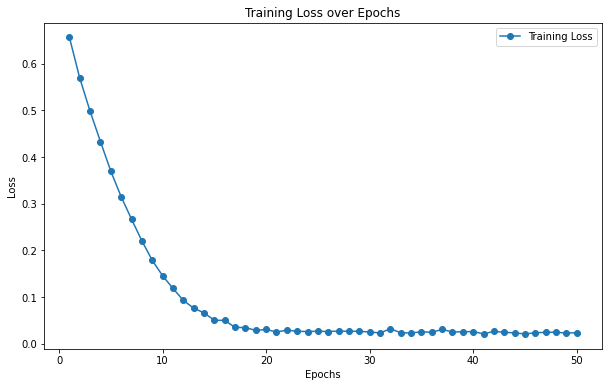

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

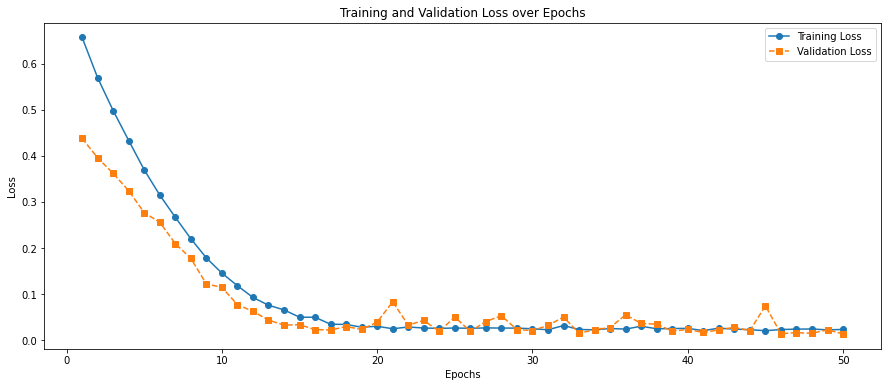

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Kara_model_LT7/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.13868394731302616
MAE : 0.10817061692473422


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,553922.875000,753595.099
1,672619.312500,909176.475
2,793761.437500,917006.278
3,738251.125000,906368.363
4,879193.437500,917403.622
5,842773.687500,910653.838
6,928018.500000,822319.125
7,713563.437500,557314.102
8,410038.500000,197129.525
9,151945.921875,75730.217


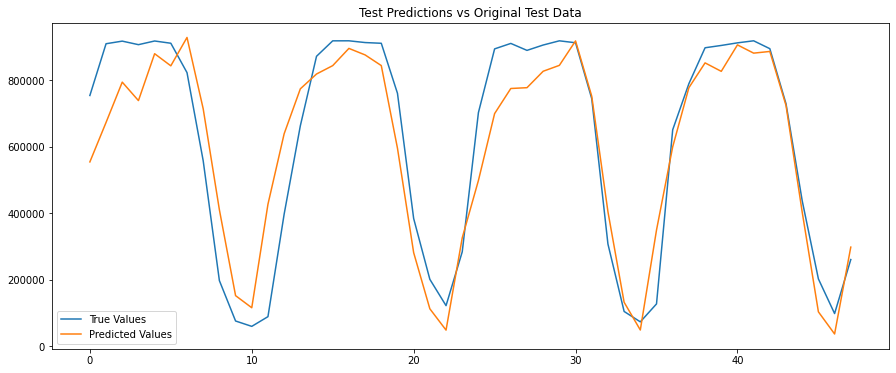

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

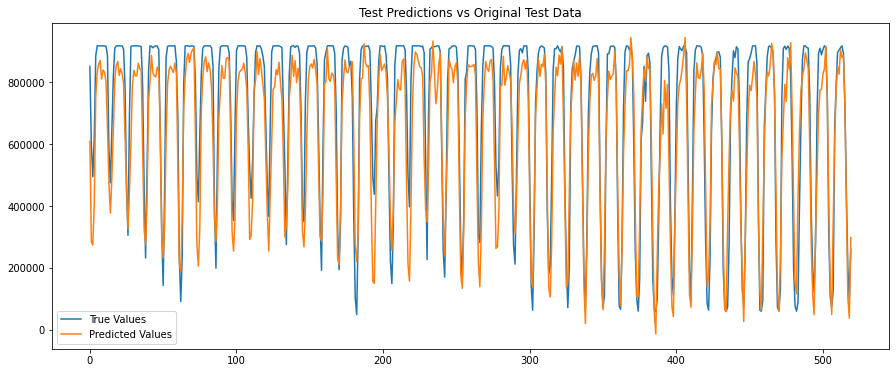

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()